<h2>Data Loading</h2>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
import os
import time
import warnings
warnings.filterwarnings('ignore')


<h2>PART 1:Load Dataset,Length of datasamples,total features,5 dataflame and missing values </h2>

In [3]:
df = pd.read_csv(r"C:\Users\PC\OneDrive\Desktop\25RP18183\ITML_801_S_A_25RP18183\dataset\heart_disease_dataset_CHUD_S_A.csv")

print(f"\nDataset loaded correctly:")
print(f"  total length of samples: {len(df)}")
print(f" length of total features: {len(df.columns)}")
print(f"\n first 5 dataframe records:")
print(df.head())

print(f"\n total sum of missing values for all features:")
print(f"Total missing values: {df.isnull().sum().sum()}")


Dataset loaded correctly:
  total length of samples: 5000
 length of total features: 14

 first 5 dataframe records:
         age     sex                cp    trestbps        chol    fbs  \
0  38.871687    Male    Typical Angina  100.490248  163.166661    NaN   
1  60.625755    Male      Asymptomatic         NaN  338.711395   True   
2  64.306898    Male               NaN  146.355656  337.004035   True   
3  57.457313  Female  Non-Anginal Pain         NaN  260.116075   True   
4  53.394739    Male  Non-Anginal Pain  129.763455  224.948879  False   

          restecg     thalach exang   oldpeak        slope   ca  \
0  LV hypertrophy  183.658119    No  0.114644    Upsloping  0.0   
1  LV hypertrophy  141.161921   NaN  2.361526  Downsloping  2.0   
2  LV hypertrophy         NaN   Yes  2.660477  Downsloping  2.0   
3             NaN  150.353969   Yes  1.145959         Flat  1.0   
4  LV hypertrophy  147.834030   Yes       NaN         Flat  NaN   

                thal heart_disease  
0  

<h2>PART 2 BASIC STATICS AND CALCULATION</h2>
   <h2>Shape for only instance</h2>

In [4]:
df.shape[0]


5000

In [5]:
print(f" shape for only instances= {df.shape[0]}")
print(f" shape for only features= {df.shape[1]}")
print(f"\n datatype for only features is")
print(df.dtypes)

print(f"\n dataset detailed information:")
df.info()

print(f"\n descriptive statistics for numerical features:")
print(df.describe())


target_col = 'target' if 'target' in df.columns else df.columns[-1]

print(f"\nsamples belong to each heart disease class:")
class_counts = df[target_col].value_counts().sort_index()
print(class_counts)

print(f"\npercentage  of each heart disease class =")
class_percentages = (df[target_col].value_counts(normalize=True).sort_index() * 100)
print(class_percentages)

print(f"\nAnalyze whether the dataset is balanced:")
max_class = class_counts.max()
min_class = class_counts.min()
imbalance_ratio = max_class / min_class
print(f"Largest class count: {max_class}")
print(f"Smallest class count: {min_class}")
print(f"Imbalance ratio: {imbalance_ratio:.2f}")
if imbalance_ratio > 1.5:
    print(" Dataset is IMBALANCED")
else:
    print(" Dataset is BALANCED")

 shape for only instances= 5000
 shape for only features= 14

 datatype for only features is
age              float64
sex               object
cp                object
trestbps         float64
chol             float64
fbs               object
restecg           object
thalach          float64
exang             object
oldpeak          float64
slope             object
ca               float64
thal              object
heart_disease     object
dtype: object

 dataset detailed information:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            4411 non-null   float64
 1   sex            4418 non-null   object 
 2   cp             4409 non-null   object 
 3   trestbps       4399 non-null   float64
 4   chol           4425 non-null   float64
 5   fbs            4421 non-null   object 
 6   restecg        4417 non-null   object 
 7   thalach        4416 non-null   float64
 8   exang          4405 non-null   object 
 9   oldpeak        4407 non-null   float64
 10  slope          4402 non-null   object 
 11  ca             4411 non-null   float64
 12  thal           4399 non-null   object 
 13  heart_disease  5000 non-null   object 
dtypes: float64(6), object(8)
memory usage: 547.0+ KB

 descriptive statistics for numerical features:
               age     trestbps         chol      thalach      oldpeak  \
count  4411.

<h2>VISUALIZATION  </h2>

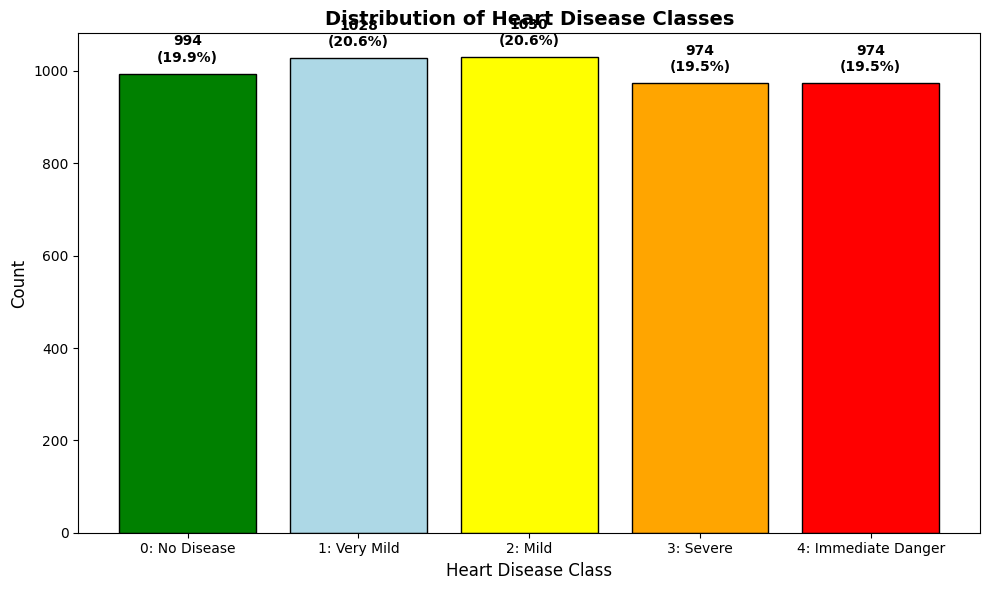

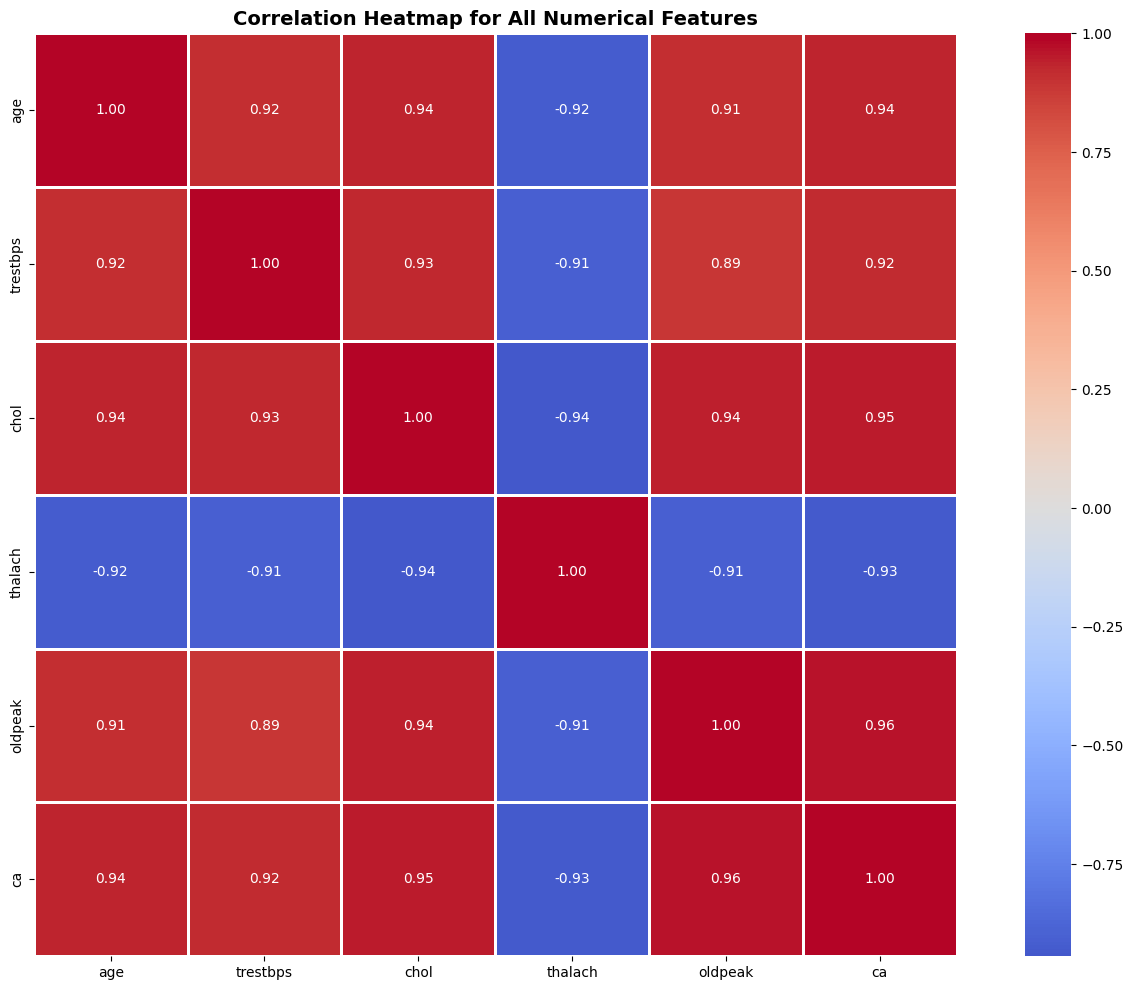

<Figure size 1000x600 with 0 Axes>

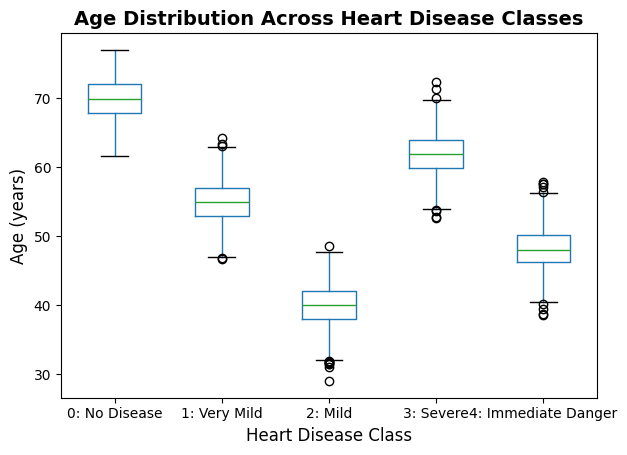

<Figure size 1000x600 with 0 Axes>

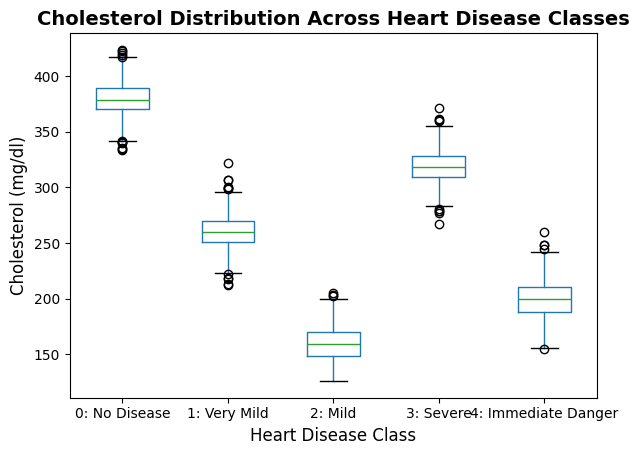

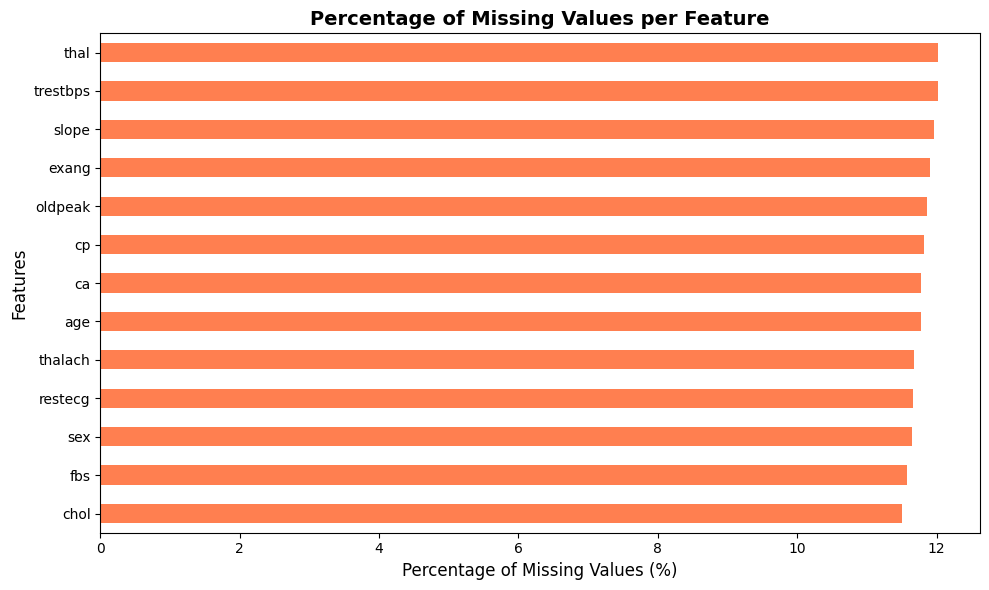

In [ ]:
# 1. Bar plot of class distribution
plt.figure(figsize=(10, 6))
counts = df[target_col].value_counts().sort_index()
percentages = (counts / len(df) * 100)
bars = plt.bar(counts.index, counts.values, color=['green', 'lightblue', 'yellow', 'orange', 'red'], edgecolor='black')
plt.xlabel('Heart Disease Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xticks(counts.index, ['0: No Disease', '1: Very Mild', '2: Mild', '3: Severe', '4: Immediate Danger'])
for i, (bar, count, pct) in enumerate(zip(bars, counts.values, percentages.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20, 
             f'{count}\n({pct:.1f}%)', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Correlation heatmap
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(14, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap for All Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Box plot - Age vs Disease Class
age_col = 'age' if 'age' in df.columns else [c for c in df.columns if 'age' in c.lower()][0]
plt.figure(figsize=(10, 6))
df.boxplot(column=age_col, by=target_col, grid=False)
plt.suptitle('')
plt.title('Age Distribution Across Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease Class', fontsize=12)
plt.ylabel('Age (years)', fontsize=12)
plt.xticks(range(1, 6), ['0: No Disease', '1: Very Mild', '2: Mild', '3: Severe', '4: Immediate Danger'])
plt.tight_layout()
plt.savefig('age_vs_class.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Box plot - Cholesterol vs Disease Class
chol_col = [c for c in df.columns if 'chol' in c.lower()][0] if any('chol' in c.lower() for c in df.columns) else 'cholesterol'
plt.figure(figsize=(10, 6))
df.boxplot(column=chol_col, by=target_col, grid=False)
plt.suptitle('')
plt.title('Cholesterol Distribution Across Heart Disease Classes', fontsize=14, fontweight='bold')
plt.xlabel('Heart Disease Class', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.xticks(range(1, 6), ['0: No Disease', '1: Very Mild', '2: Mild', '3: Severe', '4: Immediate Danger'])
plt.tight_layout()
plt.savefig('cholesterol_vs_class.png', dpi=300, bbox_inches='tight')
plt.show()
# 5. Missing values horizontal bar chart
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df) * 100)
if missing_percent.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_percent[missing_percent > 0].sort_values(ascending=True).plot(kind='barh', color='coral')
    plt.xlabel('Percentage of Missing Values (%)', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Percentage of Missing Values per Feature', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("\n No missing values found in the dataset")

<h2>PART 3 TRAIN-TEST Split</h2>

In [7]:
# ============================
# 1(a) Separate features and target variable
# ============================
X = df.drop(columns=[target_col])
y = df[target_col]


# ============================
# 1(a) Perform 80/20 Train-Test Split with random_state=42 and stratify=y
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("1(a) Train-test split completed (80/20, random_state=42, stratified)")


# ============================
# 1(b) Display number and percentage of training and testing samples
# ============================
print(f"1(b) Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"     Testing samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")


# ============================
# 1(c) Verify stratification using class distribution table
# ============================
original_dist = y.value_counts(normalize=True) * 100
train_dist = y_train.value_counts(normalize=True) * 100
test_dist = y_test.value_counts(normalize=True) * 100

stratification_df = pd.DataFrame({
    "Original (%)": original_dist,
    "Train (%)": train_dist,
    "Test (%)": test_dist
})

print("\n1(c) Stratification Verification Table:")
print(stratification_df)


# ============================
# 2(a) Identify numerical features
# ============================
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
print("\n2(a) Numerical features:", numerical_features)


# ============================
# 2(b) Count numerical features
# ============================
print("2(b) Number of numerical features:", len(numerical_features))


# ============================
# 2(c) Numerical preprocessing (Median imputation + StandardScaler)
# ============================
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# ============================
# 3(a) Identify categorical features
# ============================
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("\n3(a) Categorical features:", categorical_features)


# ============================
# 3(b) Count categorical features
# ============================
print("3(b) Number of categorical features:", len(categorical_features))


# ============================
# 3(c) Categorical preprocessing (Most frequent + OneHotEncoder)
# ============================
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


# ============================
# 4 Combine numerical and categorical pipelines using ColumnTransformer
# ============================
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


# ============================
# 5(a) Fit and transform training data
# ============================
X_train_transformed = preprocessor.fit_transform(X_train)


# ============================
# 5(b) Transform testing data
# ============================
X_test_transformed = preprocessor.transform(X_test)

print("\n5(a) Transformed training set shape:", X_train_transformed.shape)
print("5(b) Transformed testing set shape:", X_test_transformed.shape)


# ============================
# 6(a) Check missing values in training data
# ============================
print("\n6(a) Training set contains no missing values:",
      not np.isnan(X_train_transformed).any())


# ============================
# 6(b) Check missing values in testing data
# ============================
print("6(b) Testing set contains no missing values:",
      not np.isnan(X_test_transformed).any())


# ============================
# 6(c) Verify all transformed features are numeric
# ============================
print("6(c) All transformed features are numeric:",
      np.issubdtype(X_train_transformed.dtype, np.number))


1(a) Train-test split completed (80/20, random_state=42, stratified)
1(b) Training samples: 4000 (80.0%)
     Testing samples: 1000 (20.0%)

1(c) Stratification Verification Table:
                  Original (%)  Train (%)  Test (%)
heart_disease                                      
no disease               20.60     20.600      20.6
mild                     20.56     20.575      20.5
immediate danger         19.88     19.875      19.9
severe                   19.48     19.475      19.5
very mild                19.48     19.475      19.5

2(a) Numerical features: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
2(b) Number of numerical features: 6

3(a) Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
3(b) Number of categorical features: 7

5(a) Transformed training set shape: (4000, 25)
5(b) Transformed testing set shape: (1000, 25)

6(a) Training set contains no missing values: True
6(b) Testing set contains no missing values: True
6(c) All tran

<h2>PART 4: MODEL TRAINING & EVALUATION</h2>

In [8]:
# (a) Define models and hyperparameter grids
#     (MLP/ANN, Random Forest, SVM, KNN, Gradient Boosting)
# ============================
models_params = {
    'MLP/ANN': {
        'model': MLPClassifier(random_state=42, max_iter=1000),
        'params': {
            'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'classifier__activation': ['relu', 'tanh'],
            'classifier__alpha': [0.0001, 0.001]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42, probability=True),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['rbf', 'linear'],
            'classifier__gamma': ['scale', 'auto']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5]
        }
    }
}


# ============================
# (d) Create list to store performance results
# ============================
results = []


print("\n--- TRAINING MODELS WITH HYPERPARAMETER TUNING ---")

# ============================
# (a) Build full pipeline for each model
# (b) Tune each model using GridSearchCV
# ============================
for model_name, config in models_params.items():
    print(f"\nTraining {model_name}...")
    
    # (a) Create full training pipeline (Preprocessing + Classifier)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', config['model'])
    ])
    

    # (b) Apply GridSearchCV for hyperparameter tuning
    start_time = time.time()
    grid_search = GridSearchCV(
        pipeline, config['params'], cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    

    # ============================
    # (c) Get predictions and performance metrics
    # ============================
    y_train_pred = grid_search.predict(X_train)
    y_test_pred = grid_search.predict(X_test)
    
    best_cv_acc = grid_search.best_score_
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    overfitting_gap = train_acc - test_acc
    

    # ============================
    # Model fitting status
    # ============================
    if overfitting_gap > 0.1:
        status = 'Overfit'
    elif test_acc < 0.7:
        status = 'Underfit'
    else:
        status = 'Best Fit'
    

    # ============================
    # (d) Store results for later comparison
    # ============================
    results.append({
        'Model': model_name,
        'Best CV Accuracy': best_cv_acc,
        'Train Accuracy': train_acc,
        'Test Accuracy': test_acc,
        'Overfitting Gap': overfitting_gap,
        'Status': status,
        'Training Time': training_time,
        'Best Params': grid_search.best_params_,
        'Best Estimator': grid_search.best_estimator_
    })
    

    # ============================
    # (c) Display best parameters, CV accuracy and training time
    # ============================
    print(f"  Best CV Accuracy: {best_cv_acc:.4f}")
    print(f"  Train Accuracy: {train_acc:.4f}")
    print(f"  Test Accuracy: {test_acc:.4f}")
    print(f"  Training Time: {training_time:.2f}s")
    print(f"  Best Parameters: {grid_search.best_params_}")



--- TRAINING MODELS WITH HYPERPARAMETER TUNING ---

Training MLP/ANN...
  Best CV Accuracy: 0.9985
  Train Accuracy: 0.9995
  Test Accuracy: 0.9970
  Training Time: 115.24s
  Best Parameters: {'classifier__activation': 'tanh', 'classifier__alpha': 0.001, 'classifier__hidden_layer_sizes': (100,)}

Training Random Forest...
  Best CV Accuracy: 0.9995
  Train Accuracy: 1.0000
  Test Accuracy: 0.9990
  Training Time: 14.77s
  Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}

Training SVM...
  Best CV Accuracy: 0.9988
  Train Accuracy: 1.0000
  Test Accuracy: 0.9980
  Training Time: 7.27s
  Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Training KNN...
  Best CV Accuracy: 0.9963
  Train Accuracy: 1.0000
  Test Accuracy: 0.9970
  Training Time: 3.74s
  Best Parameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 9, 'classifier__weights': 'distance'}

Trai

<h2>Model Comparison</h2>

In [9]:
print("\n MODEL COMPARISON & SELECTION ")
comparison_df = pd.DataFrame(results)[['Model', 'Best CV Accuracy', 'Train Accuracy', 
                                       'Test Accuracy', 'Overfitting Gap', 'Status']]
comparison_df = comparison_df.sort_values('Test Accuracy', ascending=False)
print("\nModel Comparison Table:")
print(comparison_df.to_string(index=False))

best_model_info = results[comparison_df.index[0]]
best_model = best_model_info['Best Estimator']
best_model_name = best_model_info['Model']

print(f"\n Best Model Selected: {best_model_name}")
print(f"  Test Accuracy: {best_model_info['Test Accuracy']:.4f}")


 MODEL COMPARISON & SELECTION 

Model Comparison Table:
            Model  Best CV Accuracy  Train Accuracy  Test Accuracy  Overfitting Gap   Status
    Random Forest           0.99950          1.0000          0.999           0.0010 Best Fit
Gradient Boosting           0.99950          1.0000          0.999           0.0010 Best Fit
              SVM           0.99875          1.0000          0.998           0.0020 Best Fit
          MLP/ANN           0.99850          0.9995          0.997           0.0025 Best Fit
              KNN           0.99625          1.0000          0.997           0.0030 Best Fit

 Best Model Selected: Random Forest
  Test Accuracy: 0.9990


<h2>Detailed Information of Best Performed Model</h2>


--- DETAILED EVALUATION OF BEST MODEL ---

(a) Classification Report:
                  precision    recall  f1-score   support

      No Disease       1.00      0.99      1.00       199
       Very Mild       1.00      1.00      1.00       205
            Mild       1.00      1.00      1.00       206
          Severe       0.99      1.00      1.00       195
Immediate Danger       1.00      1.00      1.00       195

        accuracy                           1.00      1000
       macro avg       1.00      1.00      1.00      1000
    weighted avg       1.00      1.00      1.00      1000



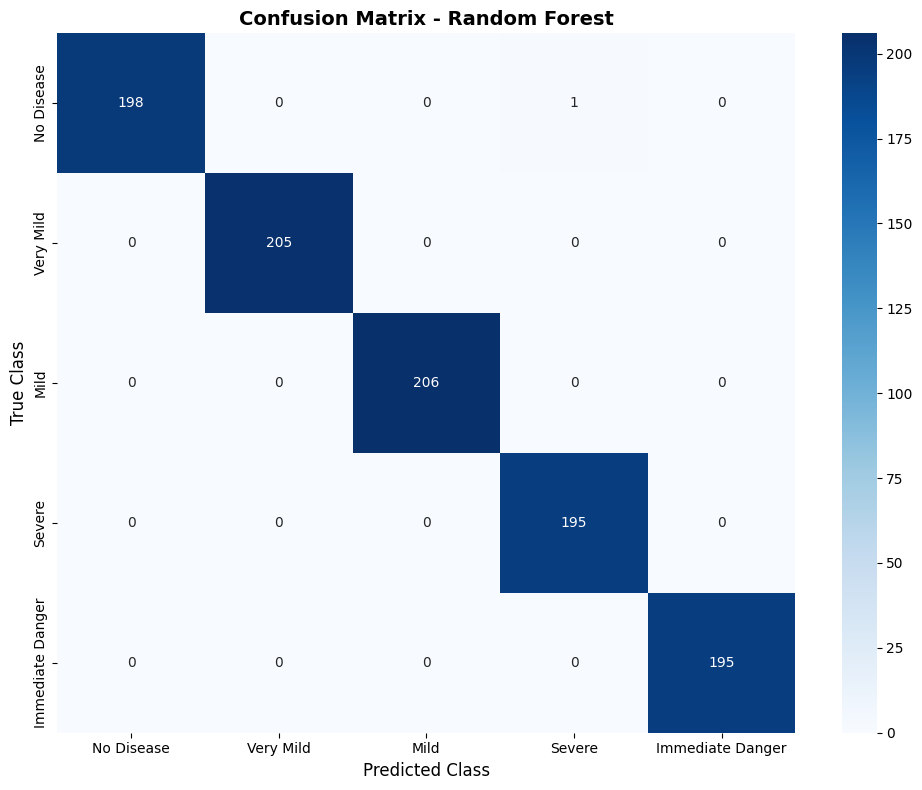


(c) Per-Class Clinical Analysis:
  Highest Precision: No Disease (1.0000)
  Clinical Interpretation: The model is most reliable when predicting No Disease cases
  Lowest Recall: No Disease (0.9950)
  Clinical Interpretation: The model misses some true No Disease cases - consider additional screening

(d) Feature Importance Analysis:

Top 10 Important Features:
               Feature  Importance
               oldpeak    0.155279
                    ca    0.117872
   cp_Non-Anginal Pain    0.106624
                  chol    0.080353
           thal_Normal    0.072332
    cp_Atypical Angina    0.058248
     cp_Typical Angina    0.057411
thal_Reversible defect    0.057205
     thal_Fixed defect    0.048458
       slope_Upsloping    0.033489


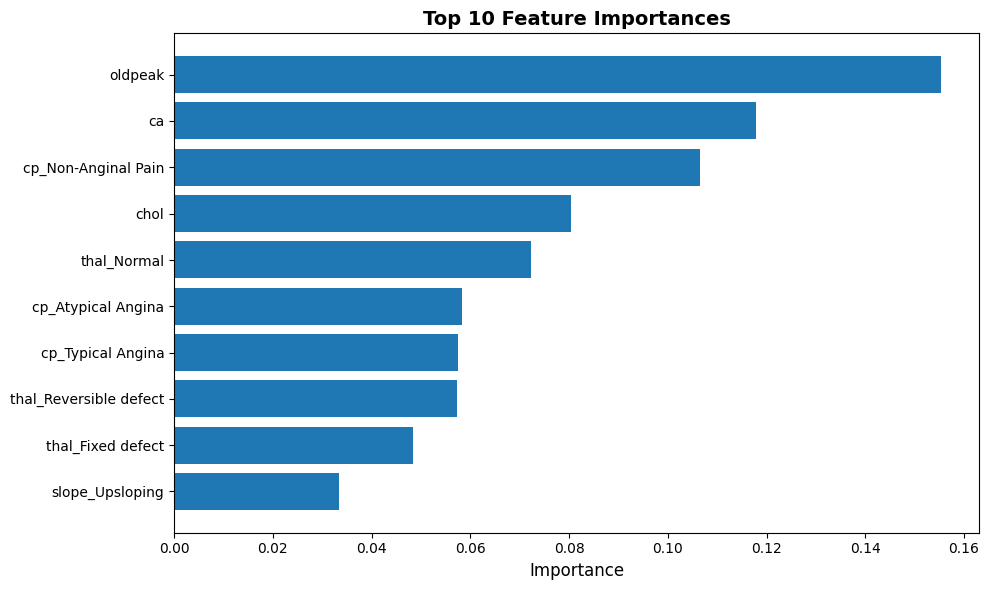

In [10]:
print("\n--- DETAILED EVALUATION OF BEST MODEL ---")
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

class_names = ['No Disease', 'Very Mild', 'Mild', 'Severe', 'Immediate Danger']

print(f"\n(a) Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Per-class analysis
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
precisions = {k: v['precision'] for k, v in report_dict.items() if k in class_names}
recalls = {k: v['recall'] for k, v in report_dict.items() if k in class_names}

highest_precision_class = max(precisions, key=precisions.get)
lowest_recall_class = min(recalls, key=recalls.get)

print(f"\n(c) Per-Class Clinical Analysis:")
print(f"  Highest Precision: {highest_precision_class} ({precisions[highest_precision_class]:.4f})")
print(f"  Clinical Interpretation: The model is most reliable when predicting {highest_precision_class} cases")
print(f"  Lowest Recall: {lowest_recall_class} ({recalls[lowest_recall_class]:.4f})")
print(f"  Clinical Interpretation: The model misses some true {lowest_recall_class} cases - consider additional screening")

# Feature Importance
print(f"\n(d) Feature Importance Analysis:")
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_names = (numerical_features + 
                    (list(preprocessor.named_transformers_['cat'].named_steps['onehot']
                          .get_feature_names_out(categorical_features)) if categorical_features else []))
    
    importances = best_model.named_steps['classifier'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\nTop 10 Important Features:")
    print(feature_importance_df.head(10).to_string(index=False))
    
    plt.figure(figsize=(10, 6))
    top_features = feature_importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title('Top 10 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("  Feature importance not available for this model type")

<h2>PART 5 MODEL PERSISTENCE</h2> 

In [11]:
# PART 5: MODEL PERSISTENCE


os.makedirs('deployment', exist_ok=True)

# (a) Save model
model_filename = 'deployment/heart_disease_model_25RP18183.pkl'
joblib.dump(best_model, model_filename)
print(f"\n(a) Model saved: {model_filename}")

# (b) Save feature columns
feature_columns = X.columns.tolist()
with open('deployment/feature_columns.txt', 'w') as f:
    for col in feature_columns:
        f.write(f"{col}\n")
print(f"(b) Feature columns saved: deployment/feature_columns.txt")

# (c) Save class names
with open('deployment/class_names.txt', 'w') as f:
    for name in class_names:
        f.write(f"{name}\n")
print(f"(c) Class names saved: deployment/class_names.txt")


# ===================== VERIFICATION I =====================
print(f"\n(d) Verification 1 - Random Test Samples:")

loaded_model = joblib.load(model_filename)

random_indices = np.random.choice(len(X_test), 5, replace=False)
verification_df = pd.DataFrame({
    'Sample': range(1, 6),
    'Actual Class': y_test.iloc[random_indices].values,
    'Predicted Class': loaded_model.predict(X_test.iloc[random_indices]),
})

verification_df["Match"] = verification_df["Actual Class"] == verification_df["Predicted Class"]

print(verification_df.to_string(index=False))


# ===================== VERIFICATION II =====================
print(f"\n(e) Verification 2 - Custom Patient Samples:")

custom_samples = X_test.iloc[:3].copy()

predictions = loaded_model.predict(custom_samples)
probabilities = loaded_model.predict_proba(custom_samples)

# Create mapping between class label and class name
label_to_name = {label: name for label, name in zip(loaded_model.classes_, class_names)}

verification2_df = pd.DataFrame({
    'Sample': range(1, 4),
    'Predicted Class': predictions,
    'Class Name': [label_to_name[p] for p in predictions],
    'Confidence': [probabilities[i][list(loaded_model.classes_).index(predictions[i])]
                   for i in range(len(predictions))]
})

# Add probability columns for each class
for i, class_label in enumerate(loaded_model.classes_):
    verification2_df[f'P({label_to_name[class_label]})'] = probabilities[:, i]

print(verification2_df.to_string(index=False))




(a) Model saved: deployment/heart_disease_model_25RP18183.pkl
(b) Feature columns saved: deployment/feature_columns.txt
(c) Class names saved: deployment/class_names.txt

(d) Verification 1 - Random Test Samples:
 Sample     Actual Class  Predicted Class  Match
      1             mild             mild   True
      2 immediate danger immediate danger   True
      3        very mild        very mild   True
      4       no disease       no disease   True
      5       no disease       no disease   True

(e) Verification 2 - Custom Patient Samples:
 Sample  Predicted Class Class Name  Confidence  P(No Disease)  P(Very Mild)  P(Mild)  P(Severe)  P(Immediate Danger)
      1             mild  Very Mild        1.00           0.00           1.0      0.0       0.00                  0.0
      2           severe     Severe        0.99           0.01           0.0      0.0       0.99                  0.0
      3 immediate danger No Disease        1.00           1.00           0.0      0.0       